Project Name - Restaurant_Data_Manipulation_Level_2

Industry - Cognifyz Technologies

Contribution - Individual

Member Name - Adhiraj Karjee

Level - 2

 Project Summary

During the second phase of my Data Science internship at Cognifyz Technologies, I delved deeper into the restaurant dataset to uncover actionable insights through a structured set of tasks. This phase, designated as Level 2, focused on three primary areas of analysis:

Task 1: Table Booking and Online Delivery Analysis  
- Assessed the proportion of restaurants offering table booking and online delivery services.  
- Performed a comparative analysis of average ratings for restaurants with and without table booking options.  
- Analyzed the availability of online delivery services across different price ranges, providing insights into customer preferences and market trends.  

Task 2: Price Range Analysis  
- Identified the most prevalent price range among restaurants.  
- Calculated the average ratings within each price range to pinpoint high-performing segments.  
- Highlighted the color associated with the highest average rating, simplifying the identification of top-rated price categories.  

Task 3: Feature Engineering  
- Leveraged advanced feature engineering techniques to derive additional insights from the existing dataset.  
- Created new features such as “Has Table Booking” and “Has Online Delivery” by encoding categorical variables, enhancing the dataset's analytical potential.  

This phase of the project emphasized a detailed exploration of table booking, delivery services, and pricing patterns while incorporating feature engineering to improve data intelligence. The insights gained have laid a solid foundation for data-driven decision-making and the overall success of the project.

Task 1: Table Booking and Online Delivery

   Restaurant ID                           Restaurant Name  Country Code  \
0        6317637                          Le Petit Souffle           162   
1        6304287                          Izakaya Kikufuji           162   
2        6300002                    Heat - Edsa Shangri-La           162   
3        6318506                                      Ooma           162   
4        6314302                               Sambo Kojin           162   
5       18189371                              Din Tai Fung           162   
6        6300781                                Buffet 101           162   
7        6301290                                   Vikings           162   
8        6300010  Spiral - Sofitel Philippine Plaza Manila           162   
9        6314987                                  Locavore           162   

               City                                            Address  \
0       Makati City  Third Floor, Century City Mall, Kalayaan Avenu...   
1       Makati 

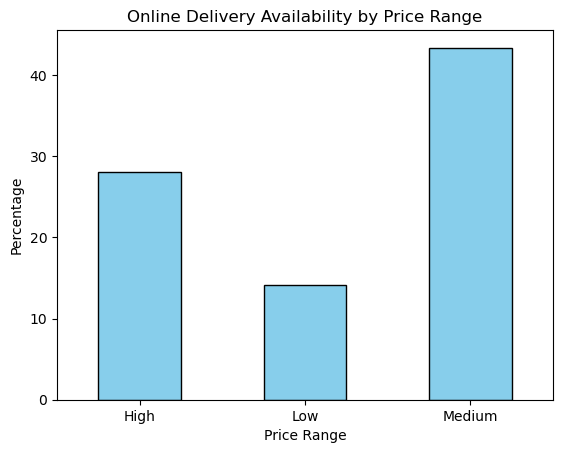

In [7]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
data = pd.read_csv(r"C:\Users\HP\Desktop\INTERNSHIP\COGNIFYZ.csv")

# Proceed with the rest of the code
print(data.head(10))

## Task 1: TABLE BOOKING AND ONLINE DELIVERY

# Percentage of restaurants that offer table booking and online delivery

# Total number of restaurants
total_num_restaurants = len(data)

# Clean and prepare data columns for consistency
data['Has Table booking'] = data['Has Table booking'].str.strip().str.lower()
data['Has Online delivery'] = data['Has Online delivery'].str.strip().str.lower()

# Percentage calculation
table_booking_percentage = (data['Has Table booking'] == 'yes').mean() * 100
online_delivery_percentage = (data['Has Online delivery'] == 'yes').mean() * 100

# Display results
print(f"Percentage of restaurants that offer Table Booking: {table_booking_percentage:.2f}%")
print(f"Percentage of restaurants that offer Online Delivery: {online_delivery_percentage:.2f}%")

# Compare the average ratings of restaurants with table booking and those without
avg_rating_with_table = data.loc[data['Has Table booking'] == 'yes', 'Aggregate rating'].mean()
avg_rating_without_table = data.loc[data['Has Table booking'] == 'no', 'Aggregate rating'].mean()

# Display results
print(f"Average rating with Table Booking: {avg_rating_with_table:.2f}")
print(f"Average rating without Table Booking: {avg_rating_without_table:.2f}")

# Analyze the availability of online delivery among restaurants with different price ranges

# Define price ranges
def categorize_price_range(value):
    if value < 500:
        return 'Low'
    elif 500 <= value <= 1000:
        return 'Medium'
    else:
        return 'High'

data['Price Range Category'] = data['Average Cost for two'].apply(categorize_price_range)

# Group by price range and calculate the percentage of online delivery
online_delivery_by_price_range = data.groupby('Price Range Category')['Has Online delivery'].apply(
    lambda x: (x.str.lower() == 'yes').mean() * 100
)

# Display results
print("Online Delivery Availability by Price Range:")
print(online_delivery_by_price_range)

# Create a bar plot to visualize online delivery availability by price range
online_delivery_by_price_range.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()


Task 2: Price Range Analysis

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
Most Common Price Range: 1
Average rating for each price range:
   Price Range  Average Rating
0            1            2.00
1            2            2.94
2            3            3.68
3            4            3.82


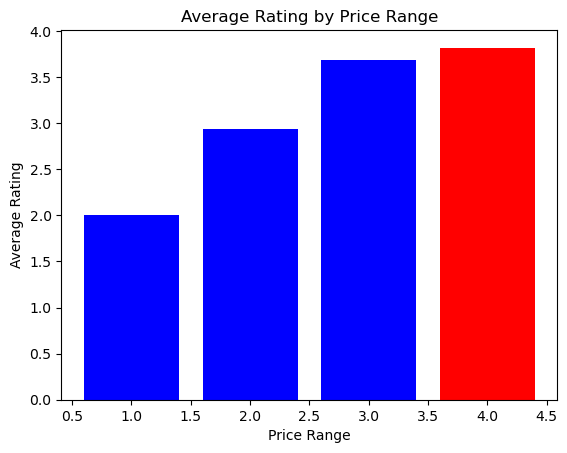

In [9]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset (ensure this step has been done before proceeding)
data = pd.read_csv(r"C:\Users\HP\Desktop\INTERNSHIP\COGNIFYZ.csv")

# Check the columns to confirm names
print(data.columns)

## Task 2: PRICE RANGE ANALYSIS

# Determine the most common price range among all the restaurants
most_common_price_range = data['Price range'].value_counts().idxmax()

# Display result
print("Most Common Price Range:", most_common_price_range)

# Calculate the average rating for each price range
avg_rating_by_price_range = data.groupby('Price range')['Aggregate rating'].mean().reset_index()

# Rename the columns
avg_rating_by_price_range.columns = ['Price Range', 'Average Rating']

# Display result
print("Average rating for each price range:")
print(avg_rating_by_price_range.round(2))

# Identify the color that represents the highest average rating among different price ranges
highest_avg_rating_index = avg_rating_by_price_range['Average Rating'].idxmax()

# Create a bar plot
colors = ['red' if i == highest_avg_rating_index else 'blue' for i in range(len(avg_rating_by_price_range))]
plt.bar(avg_rating_by_price_range['Price Range'], avg_rating_by_price_range['Average Rating'], color=colors)
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.title('Average Rating by Price Range')
plt.show()


Task 3: Feature Engineering

In [13]:
# Import libraries
import pandas as pd
import numpy as np

# Load Dataset
data = pd.read_csv(r"C:\Users\HP\Desktop\INTERNSHIP\COGNIFYZ.csv")

# Check the columns to confirm names
print("Columns in dataset:", data.columns)

## Task 3: FEATURE ENGINEERING

# Handle missing values in relevant columns
data['Restaurant Name'] = data['Restaurant Name'].fillna('')
data['Address'] = data['Address'].fillna('')
data['Has Table booking'] = data['Has Table booking'].fillna('no').str.strip().str.lower()
data['Has Online delivery'] = data['Has Online delivery'].fillna('no').str.strip().str.lower()

# Extract additional features
data['Restaurant Name Length'] = data['Restaurant Name'].apply(len)
data['Address Length'] = data['Address'].apply(len)

# Display the updated DataFrame for new features
print(data[['Restaurant Name', 'Restaurant Name Length', 'Address', 'Address Length']].head())

# Encode categorical variables
data['Has Table Booking'] = np.where(data['Has Table booking'] == 'yes', 1, 0)
data['Has Online Delivery'] = np.where(data['Has Online delivery'] == 'yes', 1, 0)

# Display the updated DataFrame for encoded features
print(data[['Has Table booking', 'Has Table Booking', 'Has Online delivery', 'Has Online Delivery']].head())


Columns in dataset: Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
          Restaurant Name  Restaurant Name Length  \
0        Le Petit Souffle                      16   
1        Izakaya Kikufuji                      16   
2  Heat - Edsa Shangri-La                      22   
3                    Ooma                       4   
4             Sambo Kojin                      11   

                                             Address  Address Length  
0  Third Floor, Century City Mall, Kalayaan Avenu...              71  
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...              67  
2  Edsa Shangri-La, 1 Garden Way, Ortigas, 